# 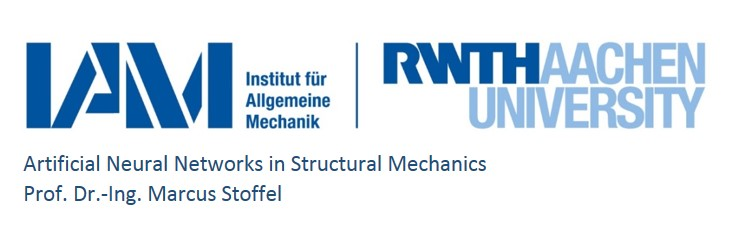

# Exercise 5 - Viscoplastic material behaviour

In [46]:
# Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [5]:
# Extract the input and the output data through .csv file

df   =  pd.read_csv('Viscoplastic_1D_Dataset.csv')

In [6]:
df

,Dev_trial_stress,X,Delta_p,Delta_X,sigma
0,1.348000,0.000000,0.00000,0.000000e+00,2.022000
1,2.696000,0.000000,0.00000,0.000000e+00,4.044000
2,4.044000,0.000000,0.00000,0.000000e+00,6.066000
3,5.392000,0.000000,0.00000,0.000000e+00,8.088000
4,6.740000,0.000000,0.00000,0.000000e+00,10.110000
...,...,...,...,...,...
4994,97.033257,18.787877,0.00003,5.584880e-09,143.527886
4995,97.033257,18.787877,0.00003,5.566509e-09,143.527886
4996,97.033257,18.787877,0.00003,5.548202e-09,143.527886
4997,97.033257,18.787877,0.00003,5.529952e-09,143.527886


In [15]:
inp = df[['Dev_trial_stress','X']]
out = df.drop(columns=['Dev_trial_stress','X'])

In [16]:
inp = inp.to_numpy()
out = out.to_numpy()

In [18]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

In [19]:
inp_n = scaler1.fit_transform(inp)
out_n = scaler2.fit_transform(out)

In [48]:
inp_train, inp_test, out_train, out_test = train_test_split(inp_n,out_n,test_size=0.33,random_state=27)

In [32]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(units=40,activation='relu'))
model.add(Dense(units=40,activation='relu'))
model.add(Dense(units=40,activation='relu'))
model.add(Dense(units=40,activation='relu'))

model.add(Dense(units=3,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 40)                120       
                                                                 
 dense_11 (Dense)            (None, 40)                1640      
                                                                 
 dense_12 (Dense)            (None, 40)                1640      
                                                                 
 dense_13 (Dense)            (None, 40)                1640      
                                                                 
 dense_14 (Dense)            (None, 3)                 123       
                                                                 
Total params: 5,163
Trainable params: 5,163
Non-trainable params: 0
_________________________________________________________________


In [33]:
opt = Adam(learning_rate=1e-3)
model.compile(loss='mse',optimizer=opt)

In [34]:
model.fit(inp_n,out_n,batch_size=32,epochs=100)

Epoch 1/100
157/157 [==============================] - 1s 610us/step - loss: 0.0437
Epoch 2/100
157/157 [==============================] - 0s 580us/step - loss: 0.0047
Epoch 3/100
157/157 [==============================] - 0s 603us/step - loss: 0.0035
Epoch 4/100
157/157 [==============================] - 0s 527us/step - loss: 0.0016
Epoch 5/100
157/157 [==============================] - 0s 629us/step - loss: 0.0010
Epoch 6/100
157/157 [==============================] - 0s 595us/step - loss: 7.2987e-04
Epoch 7/100
157/157 [==============================] - 0s 597us/step - loss: 5.9984e-04
Epoch 8/100
157/157 [==============================] - 0s 637us/step - loss: 7.2726e-04
Epoch 9/100
157/157 [==============================] - 0s 645us/step - loss: 5.2474e-04
Epoch 10/100
157/157 [==============================] - 0s 577us/step - loss: 3.4306e-04
Epoch 11/100
157/157 [==============================] - 0s 577us/step - loss: 4.0620e-04
Epoch 12/100
157/157 [============================

157/157 [==============================] - 0s 633us/step - loss: 2.4601e-05
Epoch 94/100
157/157 [==============================] - 0s 589us/step - loss: 9.3330e-05
Epoch 95/100
157/157 [==============================] - 0s 636us/step - loss: 1.1052e-04
Epoch 96/100
157/157 [==============================] - 0s 633us/step - loss: 1.4565e-04
Epoch 97/100
157/157 [==============================] - 0s 632us/step - loss: 2.3689e-05
Epoch 98/100
157/157 [==============================] - 0s 557us/step - loss: 1.4253e-04
Epoch 99/100
157/157 [==============================] - 0s 605us/step - loss: 6.6011e-05
Epoch 100/100
157/157 [==============================] - 0s 589us/step - loss: 2.7037e-05


In [38]:
output_nn = model.predict(inp_n)

output_pred = scaler2.inverse_transform(output_nn)

157/157 [==============================] - 0s 452us/step


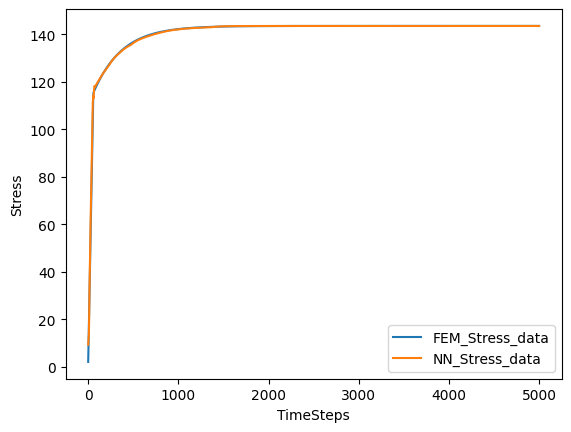

In [42]:
plt.figure()
plt.plot(out[:,-1], label='FEM_Stress_data')
plt.plot(output_pred[:,-1], label='NN_Stress_data')
plt.xlabel('TimeSteps')
plt.ylabel('Stress')
plt.legend()

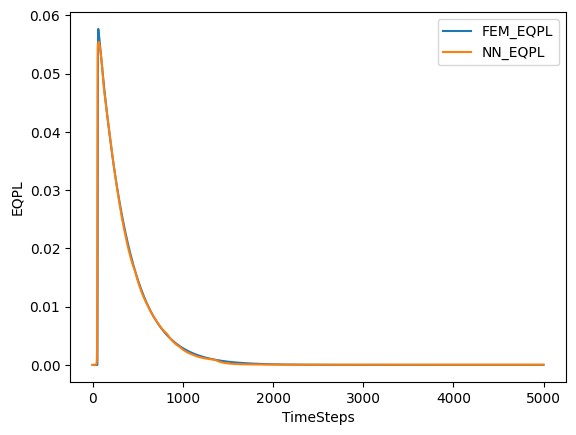

In [44]:
plt.figure()
plt.plot(out[:,1], label='FEM_EQPL')
plt.plot(output_pred[:,1], label='NN_EQPL')
plt.xlabel('TimeSteps')
plt.ylabel('EQPL')
plt.legend()

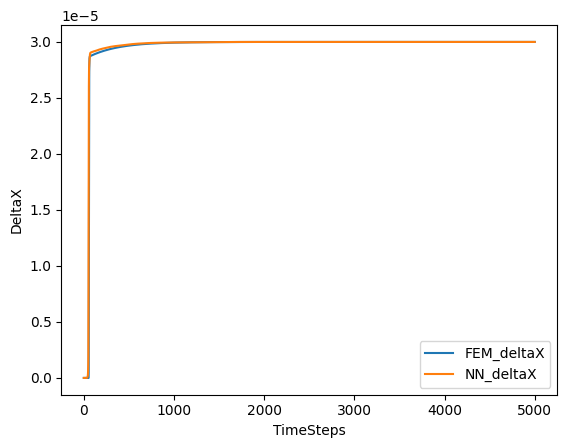

In [45]:
plt.figure()
plt.plot(out[:,0], label='FEM_deltaX')
plt.plot(output_pred[:,0], label='NN_deltaX')
plt.xlabel('TimeSteps')
plt.ylabel('DeltaX')
plt.legend()